In [1]:
import copy
import google.colab.files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from scipy import stats
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import cov
from numpy.polynomial.polynomial import polyfit
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Real data

## Load Diagnostic Test results data

In [2]:
uploaded = google.colab.files.upload()
file_name = list(uploaded.keys())[0]
# Input: xlsx file with columns "id" (any type), "total_points", and fifteen items which are 0 or 1
results_df = pd.read_excel(
    io=file_name,
    header=0,
    names=[
        "id",
        "total_points",
    ],
    usecols=[2, 7],
)
results_df

Saving Anonymized results of diagnostic test.xlsx to Anonymized results of diagnostic test (1).xlsx


,id,total_points
0,0,13
1,1,5
2,2,6
3,3,14
4,4,11
...,...,...
954,954,12
955,955,12
956,956,5
957,957,13


In [3]:
results_df[results_df.id != ""]

,id,total_points
0,0,13
1,1,5
2,2,6
3,3,14
4,4,11
...,...,...
954,954,12
955,955,12
956,956,5
957,957,13


## Load Programming C1 grades

### UTFSM - Part 1

In [4]:
uploaded = google.colab.files.upload()
file_name = list(uploaded.keys())[0]

part1_grades_df = pd.DataFrame()

for i in range(17):

    part1_grades_df_grades_by_section_df = pd.read_excel(
        io=file_name,
        skiprows=3,
        sheet_name=i,
        names=[
            "vtr",
            "career",
            "id",
            "c1_grade",
            "avg_assignments",
        ],
        usecols=[10, 11, 12, 13, 69],
        engine='openpyxl',
    )
    part1_grades_df = part1_grades_df.append(part1_grades_df_grades_by_section_df)

part1_grades_df = part1_grades_df.dropna(subset=["id", "c1_grade"])
original_part1_grades_df = part1_grades_df

Saving Anonymized C1 IWI131 Part 1.xlsx to Anonymized C1 IWI131 Part 1 (1).xlsx


In [5]:
part1_grades_df

,vtr,career,id,c1_grade,avg_assignments
0,1.0,NN,472.0,100.0,93.5
1,1.0,NN,169.0,98.0,97.0
2,1.0,NN,353.0,92.0,89.0
3,1.0,NN,265.0,89.0,95.5
4,1.0,NN,264.0,80.0,83.5
...,...,...,...,...,...
34,2.0,NN,502.0,8.0,0.0
35,2.0,NN,244.0,98.0,87.5
36,1.0,NN,426.0,40.0,63.5
38,2.0,NN,297.0,96.0,67.5


### UTFSM - Part 2

In [19]:
uploaded = google.colab.files.upload()
file_name = list(uploaded.keys())[0]

part2_grades_df = pd.DataFrame()

for i in range(14):

    part2_grades_by_section_df = pd.read_excel(
        io=file_name,
        skiprows=3,
        sheet_name=i,
        names=[
            "vtr",
            "career",
            "id",
            "c1_grade",
            "avg_assignments",
        ],
        usecols=[8, 9, 10, 11, 16],
    )
    part2_grades_df = part2_grades_df.append(part2_grades_by_section_df)

part2_grades_df = part2_grades_df.dropna(subset=["id", "c1_grade"])
original_part2_grades_df = part2_grades_df

Saving Anonymized C1 IWI131 Part 2.xlsx to Anonymized C1 IWI131 Part 2.xlsx


In [20]:
part2_grades_df

,vtr,career,id,c1_grade,avg_assignments
0,1.0,Ing. Civil Informática,590.0,91.0,100.0
1,1.0,Ing. Civil Informática,869.0,94.0,88.0
2,1.0,Ing. Civil Informática,711.0,90.0,72.0
3,1.0,Ing. Civil Informática,784.0,90.0,93.5
4,1.0,Ing. Civil Informática,641.0,98.0,96.5
...,...,...,...,...,...
24,2.0,Ingeniería Civil de Minas,717.0,50.0,49.5
25,2.0,Ingeniería Civil de Minas,847.0,99.0,99.0
26,2.0,Ing. Civil,533.0,100.0,90.5
27,2.0,Ingeniería Civil de Minas,829.0,82.0,92.4


### UTFSM - Part 3

In [11]:
uploaded = google.colab.files.upload()
file_name = list(uploaded.keys())[0]

part3_grades_df = pd.DataFrame()

for i in range(4):
    if i in [0]:
        cols_to_use = [10, 11, 12, 13, 18]
    elif i in [1, 2, 3]:
        cols_to_use = [11, 12, 13, 14, 19]

    part3_grades_by_section_df = pd.read_excel(
        io=file_name,
        skiprows=3,
        sheet_name=i,
        names=[
            "vtr",
            "career",
            "id",
            "c1_grade",
            "avg_assignments",
        ],
        usecols=cols_to_use,
    )
    part3_grades_df = part3_grades_df.append(part3_grades_by_section_df)

part3_grades_df = part3_grades_df.dropna(subset=["id", "c1_grade"])
original_part3_grades_df = part3_grades_df

Saving Anonymized C1 IWI131 Part 3.xlsx to Anonymized C1 IWI131 Part 3.xlsx


In [12]:
part3_grades_df

,vtr,career,id,c1_grade,avg_assignments
0,1.0,NN,936.0,0.0,42.0
2,1.0,NN,925.0,93.0,87.0
3,2.0,NN,958.0,58.0,37.0
5,1.0,NN,944.0,74.0,71.0
6,1.0,NN,904.0,63.0,45.0
7,1.0,NN,953.0,69.0,67.0
10,1.0,NN,951.0,97.0,90.0
11,1.0,NN,935.0,65.0,84.0
14,1.0,NN,956.0,46.0,85.0
16,1.0,NN,930.0,70.0,78.0


## Restore dfs

In [65]:
part1_grades_df = original_part1_grades_df
part2_grades_df = original_part2_grades_df
part3_grades_df = original_part3_grades_df

## Grouped c1 grades

In [66]:
programming_course_c1_grades = pd.DataFrame()
programming_course_c1_grades = programming_course_c1_grades.append(part1_grades_df)
programming_course_c1_grades = programming_course_c1_grades.append(part2_grades_df)
programming_course_c1_grades = programming_course_c1_grades.append(part3_grades_df)
programming_course_c1_grades

,vtr,career,id,c1_grade,avg_assignments
0,1.0,NN,472.0,100.0,93.5
1,1.0,NN,169.0,98.0,97.0
2,1.0,NN,353.0,92.0,89.0
3,1.0,NN,265.0,89.0,95.5
4,1.0,NN,264.0,80.0,83.5
...,...,...,...,...,...
9,2.0,NN,933.0,100.0,99.0
10,2.0,NN,932.0,80.0,97.0
11,2.0,NN,908.0,99.0,95.0
13,2.0,NN,918.0,65.0,78.0


## Remove certain students

### Remove student who are repeating the course

In [67]:
programming_course_c1_grades = programming_course_c1_grades.loc[programming_course_c1_grades['vtr'] < 2]
programming_course_c1_grades

,vtr,career,id,c1_grade,avg_assignments
0,1.0,NN,472.0,100.0,93.5
1,1.0,NN,169.0,98.0,97.0
2,1.0,NN,353.0,92.0,89.0
3,1.0,NN,265.0,89.0,95.5
4,1.0,NN,264.0,80.0,83.5
...,...,...,...,...,...
24,1.0,NN,907.0,95.0,65.0
25,1.0,NN,948.0,56.0,51.0
26,1.0,NN,906.0,62.0,69.0
27,1.0,NN,923.0,60.0,46.0


## Check CSV

In [68]:
programming_course_c1_grades.to_csv("check_csv.csv")

## Merge diagnostic test results and c1 grades

In [70]:
diagnostic_test_and_programming_grades_results = pd.merge(
    results_df, programming_course_c1_grades, on="id"
)
diagnostic_test_and_programming_grades_results["c1_grade"] = diagnostic_test_and_programming_grades_results["c1_grade"].astype(int)
diagnostic_test_and_programming_grades_results = diagnostic_test_and_programming_grades_results.dropna(subset=["id", "total_points", "c1_grade"])
diagnostic_test_and_programming_grades_results

,id,total_points,vtr,career,c1_grade,avg_assignments
0,0,13,1.0,NN,86,97.5
1,1,5,1.0,NN,77,89.2
2,3,14,1.0,NN,96,93.0
3,4,11,1.0,NN,98,95.4
4,5,7,1.0,NN,91,99.0
...,...,...,...,...,...,...
731,951,13,1.0,NN,97,90.0
732,952,15,1.0,NN,95,99.0
733,953,8,1.0,NN,69,67.0
734,954,12,1.0,NN,100,96.0


### Remove students who dropped out the course

In [71]:
# only remove studest who dropped out the course
diagnostic_test_and_programming_grades_results = diagnostic_test_and_programming_grades_results.loc[
    diagnostic_test_and_programming_grades_results['id'] != 32
]
diagnostic_test_and_programming_grades_results = diagnostic_test_and_programming_grades_results.loc[
    diagnostic_test_and_programming_grades_results['id'] != 849
]

In [72]:
diagnostic_test_and_programming_grades_results

,id,total_points,vtr,career,c1_grade,avg_assignments
0,0,13,1.0,NN,86,97.5
1,1,5,1.0,NN,77,89.2
2,3,14,1.0,NN,96,93.0
3,4,11,1.0,NN,98,95.4
4,5,7,1.0,NN,91,99.0
...,...,...,...,...,...,...
731,951,13,1.0,NN,97,90.0
732,952,15,1.0,NN,95,99.0
733,953,8,1.0,NN,69,67.0
734,954,12,1.0,NN,100,96.0


# Checking Pearson's correlation

In [73]:
diagnostic_test_total_points_by_student_array = list(diagnostic_test_and_programming_grades_results["total_points"])
programming_c1_grade_by_student_array = list(diagnostic_test_and_programming_grades_results["c1_grade"])

In [74]:
x = np.array(diagnostic_test_total_points_by_student_array)
y = np.array(programming_c1_grade_by_student_array)
m, b = np.polyfit(x, y, 1)

Diagnostic test: mean=11.008 stdv=2.613
Prog. course grade: mean=78.151 stdv=28.051


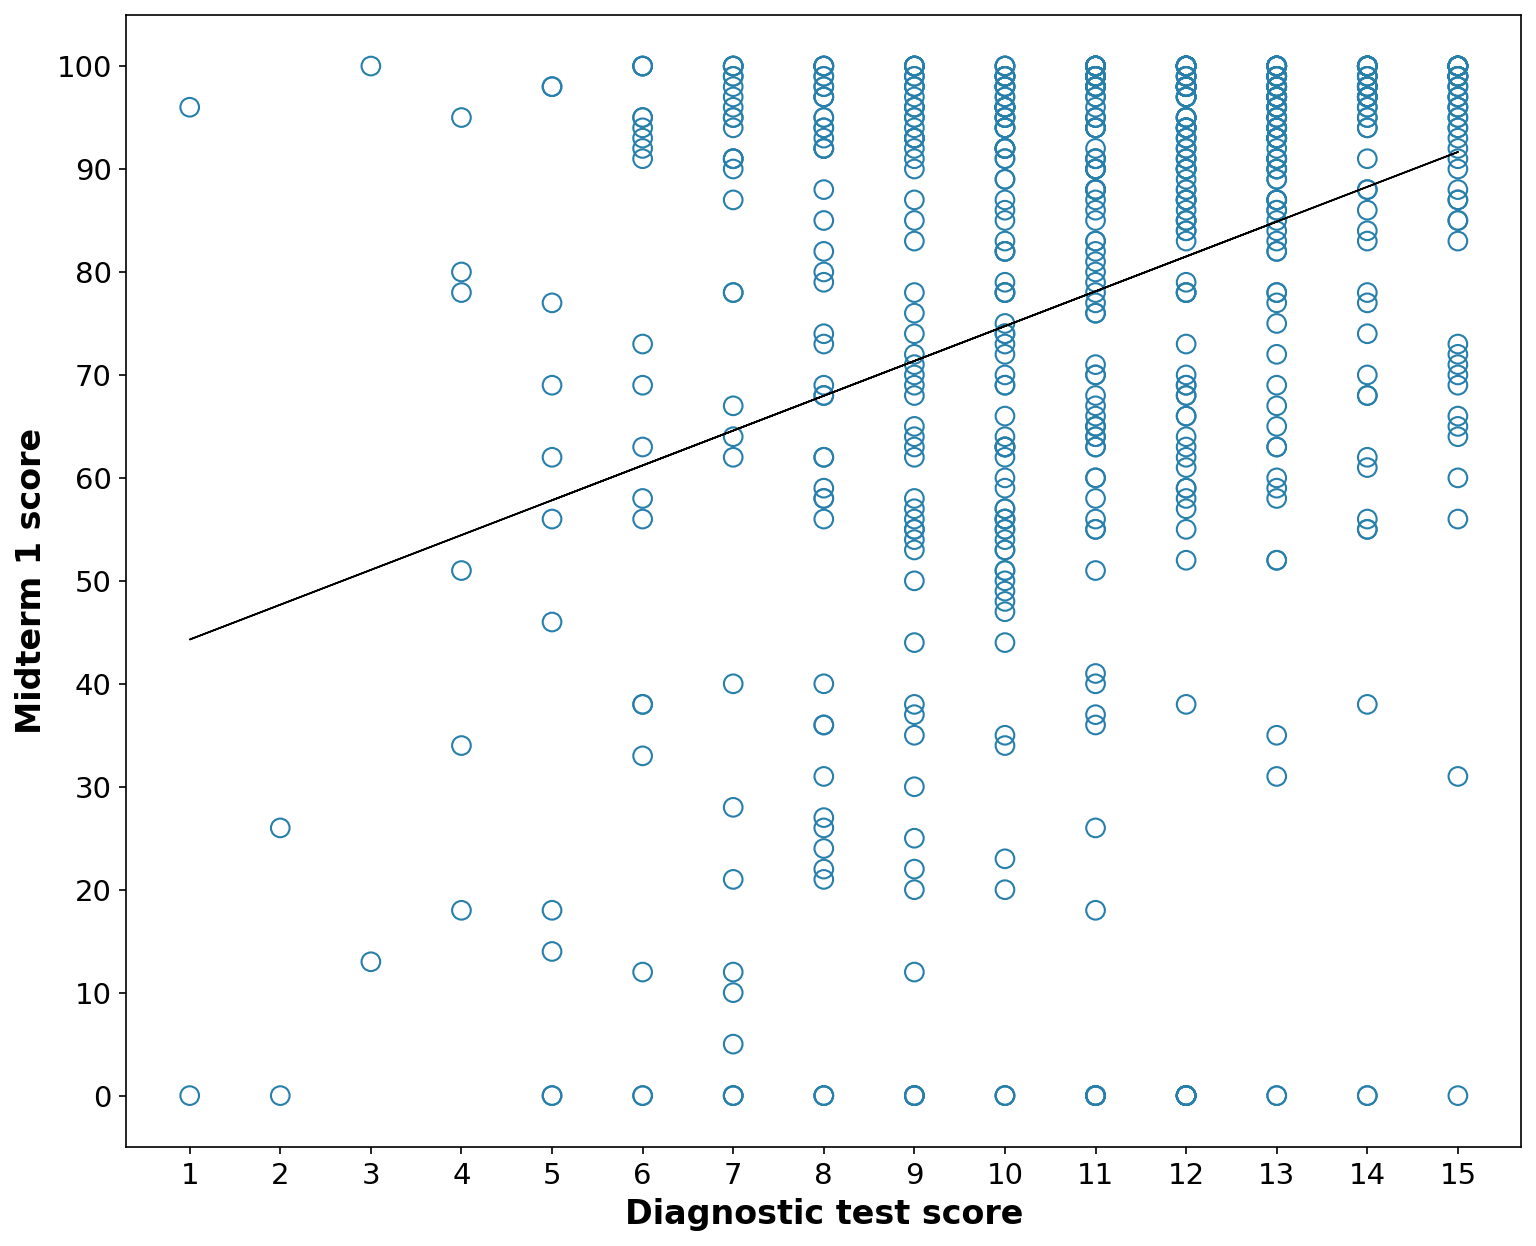

In [75]:
# summarize
print('Diagnostic test: mean=%.3f stdv=%.3f' % (mean(diagnostic_test_total_points_by_student_array), std(diagnostic_test_total_points_by_student_array)))
print('Prog. course grade: mean=%.3f stdv=%.3f' % (mean(programming_c1_grade_by_student_array), std(programming_c1_grade_by_student_array)))
# plot
pyplot.figure(num=None, figsize=(12, 10), dpi=150, facecolor='w', edgecolor='k')
pyplot.scatter(diagnostic_test_total_points_by_student_array, programming_c1_grade_by_student_array, s=80, facecolors='none', edgecolors='#277fab')
pyplot.xticks(np.arange(min(diagnostic_test_total_points_by_student_array), max(diagnostic_test_total_points_by_student_array)+1, 1.0), size=14)
pyplot.yticks(np.arange(0, 110, 10.0), size=14)
pyplot.xlabel("Diagnostic test score", weight = 'bold', fontsize=16)
pyplot.ylabel("Midterm 1 score", weight = 'bold', fontsize=16)
plt.plot(x, m*x + b, color='black', linewidth=0.8)
pyplot.savefig('scatter_diagtest_vs_progra_grades.png')

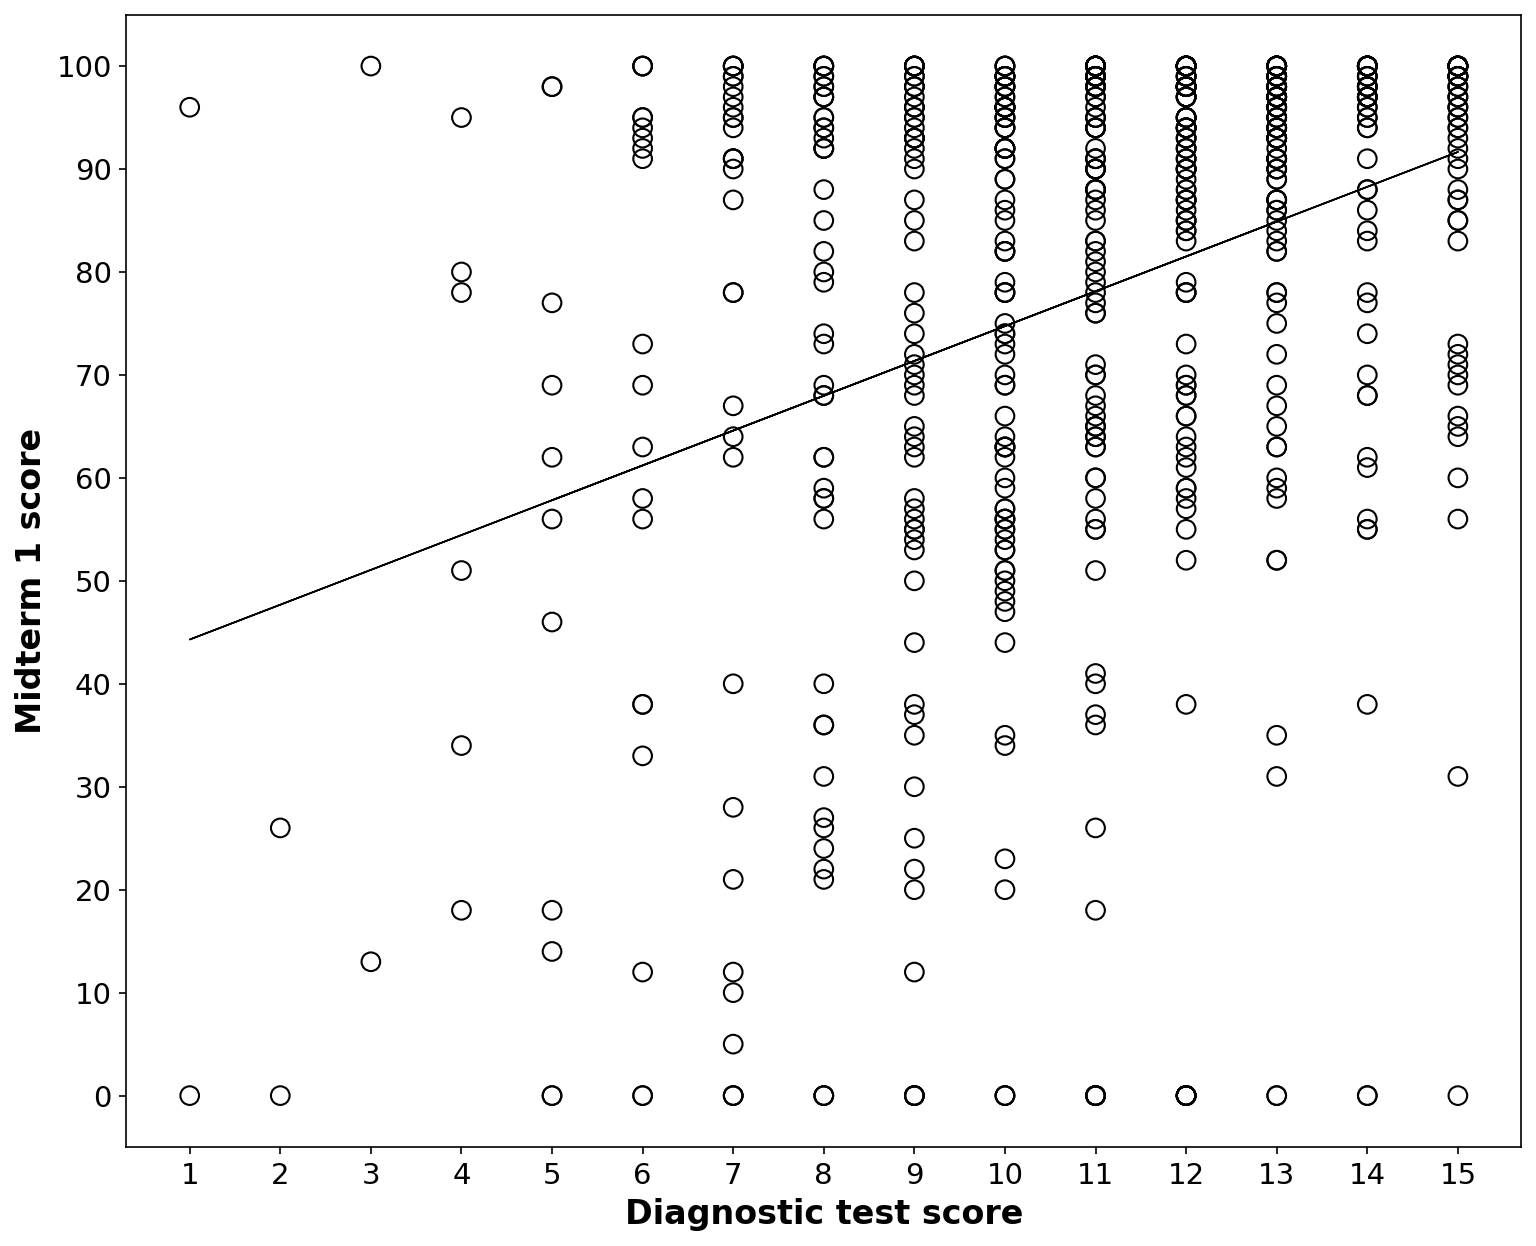

In [76]:
# Gray scale plot
pyplot.figure(num=None, figsize=(12, 10), dpi=150, facecolor='w', edgecolor='k')
pyplot.scatter(diagnostic_test_total_points_by_student_array, programming_c1_grade_by_student_array, s=80, facecolors='none', edgecolors='k')
pyplot.xticks(np.arange(min(diagnostic_test_total_points_by_student_array), max(diagnostic_test_total_points_by_student_array)+1, 1.0), size=14)
pyplot.yticks(np.arange(0, 110, 10.0), size=14)
pyplot.xlabel("Diagnostic test score", weight = 'bold', fontsize=16)
pyplot.ylabel("Midterm 1 score", weight = 'bold', fontsize=16)
plt.plot(x, m*x + b, color='black', linewidth=0.8)
pyplot.savefig('scatter_diagtest_vs_progra_grades_gray_scale.png')

In [77]:
# calculate the covariance between two variables
# seed random number generator

# calculate covariance matrix
covariance = cov(diagnostic_test_total_points_by_student_array, programming_c1_grade_by_student_array)
print(covariance)

[[  6.83485805  23.1188167 ]
 [ 23.1188167  787.95936412]]


In [78]:
# calculate Pearson's correlation
corr, p = pearsonr(diagnostic_test_total_points_by_student_array, programming_c1_grade_by_student_array)
print('Pearsons correlation: %.3f' % corr, "p: ", p)

Pearsons correlation: 0.315 p:  2.2513979275598052e-18


In [79]:
# calculate Pearson's correlation
corr, p = pearsonr(diagnostic_test_total_points_by_student_array, programming_c1_grade_by_student_array)
print('Pearsons correlation: %.3f' % corr, "p: ", p)

Pearsons correlation: 0.315 p:  2.2513979275598052e-18
